# ASDA - Assignment 09 (Model Simplification/Reduction) - Group 5

## 2) Agriculture Yield Dataset

### Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.formula.api import ols

### Importing the dataset

In [79]:
df = pd.read_csv(r"C:\Users\HAFIZ-TECH\Downloads\splityield.txt", sep="\\t", engine="python")

# Display the first few rows
df

,yield,block,irrigation,density,fertilizer
0,90,A,control,low,N
1,95,A,control,low,P
2,107,A,control,low,NP
3,92,A,control,medium,N
4,89,A,control,medium,P
...,...,...,...,...,...
67,131,D,irrigated,medium,P
68,126,D,irrigated,medium,NP
69,116,D,irrigated,high,N
70,136,D,irrigated,high,P


In [80]:
df = df.rename(columns={"yield":"yield_output"})
df

,yield_output,block,irrigation,density,fertilizer
0,90,A,control,low,N
1,95,A,control,low,P
2,107,A,control,low,NP
3,92,A,control,medium,N
4,89,A,control,medium,P
...,...,...,...,...,...
67,131,D,irrigated,medium,P
68,126,D,irrigated,medium,NP
69,116,D,irrigated,high,N
70,136,D,irrigated,high,P


### EDA

In [81]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   yield_output  72 non-null     int64 
 1   block         72 non-null     object
 2   irrigation    72 non-null     object
 3   density       72 non-null     object
 4   fertilizer    72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB
None
       yield_output
count     72.000000
mean      99.722222
std       18.292015
min       60.000000
25%       86.000000
50%       95.000000
75%      114.000000
max      136.000000


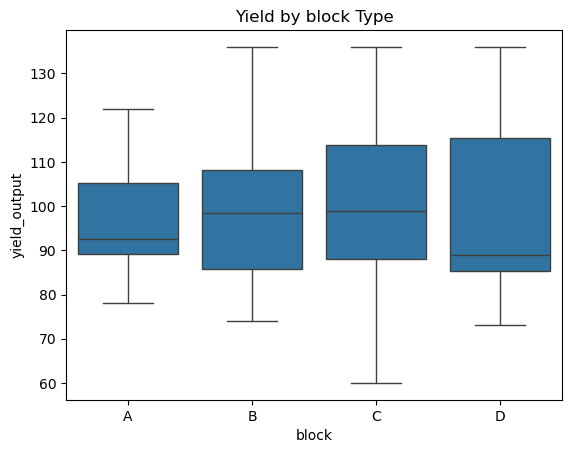

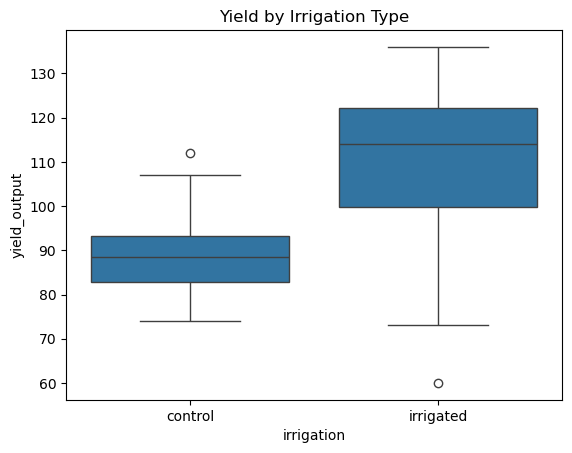

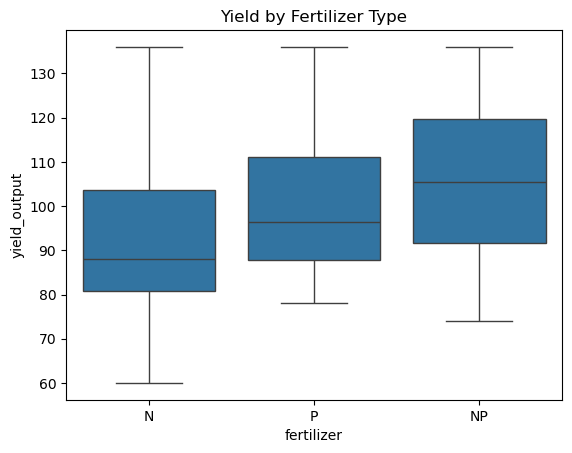

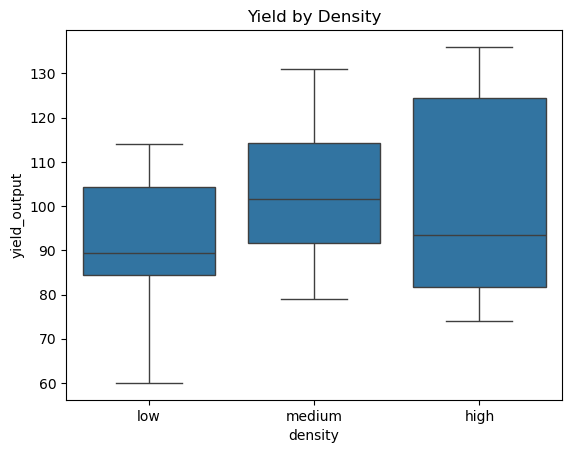

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of yield by irrigation type
sns.boxplot(x="block", y="yield_output", data=df)
plt.title("Yield by block Type")
plt.show()


# Boxplot of yield by irrigation type
sns.boxplot(x="irrigation", y="yield_output", data=df)
plt.title("Yield by Irrigation Type")
plt.show()

# Boxplot of yield by fertilizer type
sns.boxplot(x="fertilizer", y="yield_output", data=df)
plt.title("Yield by Fertilizer Type")
plt.show()

# Boxplot of yield by density
sns.boxplot(x="density", y="yield_output", data=df)
plt.title("Yield by Density")
plt.show()


### ANOVA

In [83]:
# Fit the ANOVA model
model = ols("yield_output ~ C(block) + C(irrigation) + C(density) + C(fertilizer)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq    df          F        PR(>F)
C(block)         194.444444   3.0   0.353577  7.866939e-01
C(irrigation)   8277.555556   1.0  45.155624  6.137816e-09
C(density)      1758.361111   2.0   4.796095  1.151318e-02
C(fertilizer)   1977.444444   2.0   5.393666  6.883359e-03
Residual       11548.638889  63.0        NaN           NaN


In [84]:
anova_model_refined = ols("yield_output ~ C(irrigation) + C(fertilizer) + C(density)", data=df).fit()
anova_table_refined = sm.stats.anova_lm(anova_model_refined, typ=2)
print(anova_table_refined)

                     sum_sq    df          F        PR(>F)
C(irrigation)   8277.555556   1.0  46.522591  3.370597e-09
C(fertilizer)   1977.444444   2.0   5.556945  5.882660e-03
C(density)      1758.361111   2.0   4.941285  1.000606e-02
Residual       11743.083333  66.0        NaN           NaN


### Null Model

In [85]:
model_used, model_aic, model_deviance = [], [], []

In [86]:
# null model
formula = "yield_output ~ 1"
model = smf.glm(formula, df, family = sm.families.Gaussian()) # https://www.statsmodels.org/stable/glm.html#families
result = model.fit()
print(result.summary())
model_used.append('null model')
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(round(result.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           yield_output   No. Observations:                   72
Model:                            GLM   Df Residuals:                       71
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          334.60
Method:                          IRLS   Log-Likelihood:                -310.93
Date:                Thu, 12 Dec 2024   Deviance:                       23756.
Time:                        15:12:01   Pearson chi2:                 2.38e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          9.735e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7222      2.156     46.259      0.0

### Full Model

In [105]:
# full model
formula = "yield_output ~ C(irrigation) * C(fertilizer) * C(density)"
model = smf.glm(formula, df, family = sm.families.Gaussian()) # https://www.statsmodels.org/stable/glm.html#families
result = model.fit()
print(result.summary())
model_used.append('full model')
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(round(result.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           yield_output   No. Observations:                   72
Model:                            GLM   Df Residuals:                       54
Model Family:                Gaussian   Df Model:                           17
Link Function:               Identity   Scale:                          138.94
Method:                          IRLS   Log-Likelihood:                -269.43
Date:                Thu, 12 Dec 2024   Deviance:                       7503.0
Time:                        15:42:26   Pearson chi2:                 7.50e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8103
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

### Parsimonious Model

In [88]:
#candidate model

# Filter out the 'medium' category from the 'density' variable
df_filtered = df[df['density'] != 'medium']

# Define the formula for GLM
formula = "yield_output ~ C(irrigation) + C(fertilizer) + C(density)"

# Fit the GLM model with the filtered data
model = smf.glm(formula, data=df_filtered, family=sm.families.Gaussian())
result = model.fit()

# Print the summary of the model
print(result.summary())

# Store the model details
model_used.append('Refined model (without medium density)')
model_aic.append(result.aic)
model_deviance.append(result.deviance)

# Print the AIC for the refined model
print("The result of the AIC for the refined model is: ")
print(round(result.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           yield_output   No. Observations:                   48
Model:                            GLM   Df Residuals:                       43
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          205.81
Method:                          IRLS   Log-Likelihood:                -193.32
Date:                Thu, 12 Dec 2024   Deviance:                       8849.6
Time:                        15:12:01   Pearson chi2:                 8.85e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6221
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [89]:
metrics = {"model used": model_used,
           "aic": model_aic,
           "deviance": model_deviance}

metrics_df = pd.DataFrame(metrics)
metrics_df

,model used,aic,deviance
0,null model,623.851045,23756.444444
1,full model,583.120606,11743.083333
2,Refined model (without medium density),396.630821,8849.645833
